In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
#import tensorflow_datasets
import PIL
import os
import pathlib

In [ ]:
os.listdir()

['.ipynb_checkpoints',
 'notebook_hp.ipynb',
 'EDA_RR.ipynb',
 'EDA_MA.ipynb',
 'Maria.ipynb']

# Preprocessing and Exploratory Data Analysis for Pawparazzi

Currently I am following this tensorflow [tutorial](https://www.tensorflow.org/tutorials/images/classification)

In [8]:
image_path = '../raw_data/images/Images/n02086079-Pekinese/n02086079_207.jpg'

In [9]:
image_loaded = tf.keras.utils.load_img(image_path)

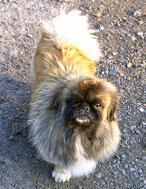

In [10]:
image_loaded

In [22]:
data_dir = pathlib.Path('../raw_data/images/Images')

In [23]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

20580


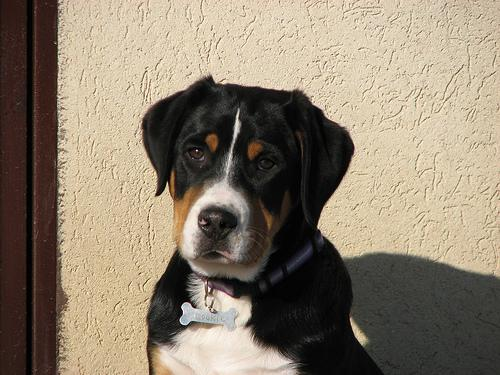

In [43]:
gswiss = list(data_dir.glob('*Greater_Swiss*/*'))
PIL.Image.open(str(gswiss[19]))

## Creating a dataset

In [28]:
batch_size = 32
img_height = 180
img_width = 180

In [ ]:
seed_train_validation = 69
shuffle_value = True
validation_split = 0.3

train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split = validation_split,
    subset="training",
    seed = seed_train_validation,
    image_size = (img_height, img_width),
    batch_size = batch_size
)

val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=validation_split,
  subset="validation",
  seed=seed_train_validation,
  image_size=(img_height, img_width),
  batch_size=batch_size
  )

In [59]:
val_batches = tf.data.experimental.cardinality(val_ds)
test_ds = val_ds.take((2*val_batches) // 3)
val_ds = val_ds.skip((2*val_batches) // 3)

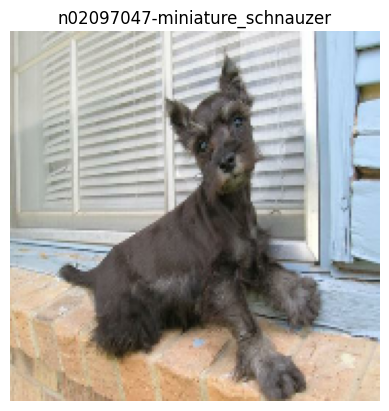

In [111]:
for images, labels in train_ds.take(1):
    plt.imshow(images[0].numpy().astype("uint8"))
    plt.title(class_names[labels[0]])
    plt.axis("off")
    plt.show()

In [66]:
class_names = train_ds.class_names
print(class_names)

['n02085620-Chihuahua', 'n02085782-Japanese_spaniel', 'n02085936-Maltese_dog', 'n02086079-Pekinese', 'n02086240-Shih-Tzu', 'n02086646-Blenheim_spaniel', 'n02086910-papillon', 'n02087046-toy_terrier', 'n02087394-Rhodesian_ridgeback', 'n02088094-Afghan_hound', 'n02088238-basset', 'n02088364-beagle', 'n02088466-bloodhound', 'n02088632-bluetick', 'n02089078-black-and-tan_coonhound', 'n02089867-Walker_hound', 'n02089973-English_foxhound', 'n02090379-redbone', 'n02090622-borzoi', 'n02090721-Irish_wolfhound', 'n02091032-Italian_greyhound', 'n02091134-whippet', 'n02091244-Ibizan_hound', 'n02091467-Norwegian_elkhound', 'n02091635-otterhound', 'n02091831-Saluki', 'n02092002-Scottish_deerhound', 'n02092339-Weimaraner', 'n02093256-Staffordshire_bullterrier', 'n02093428-American_Staffordshire_terrier', 'n02093647-Bedlington_terrier', 'n02093754-Border_terrier', 'n02093859-Kerry_blue_terrier', 'n02093991-Irish_terrier', 'n02094114-Norfolk_terrier', 'n02094258-Norwich_terrier', 'n02094433-Yorkshire_t

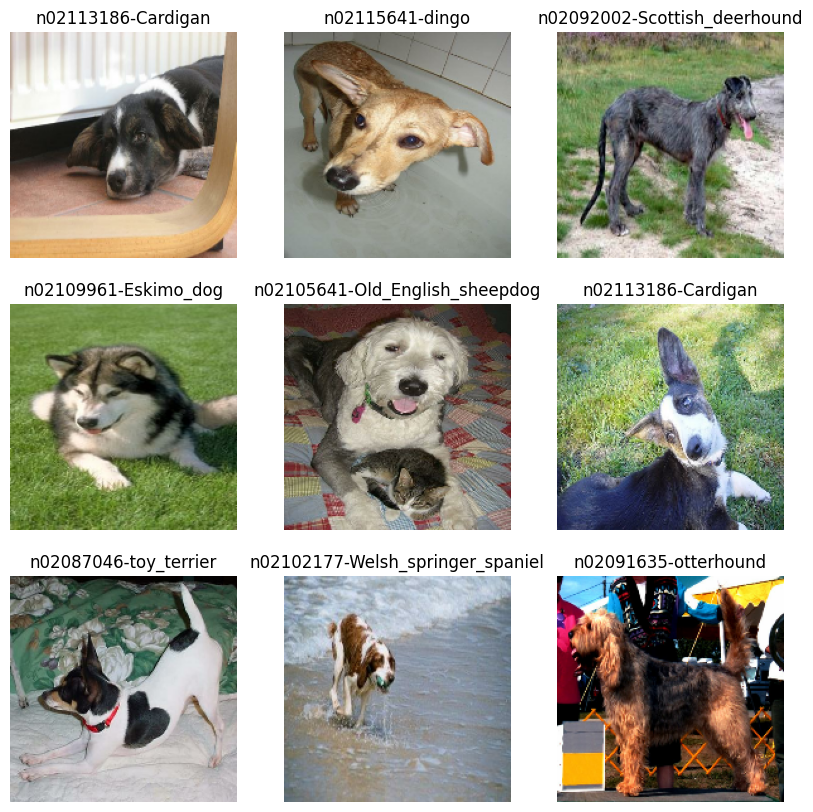

In [67]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

## Confirming the baseline predicion

We're counting the most common class in `data_train` and predicting what is the most common when testing

In [ ]:
from collections import Counter

label_counts = Counter()
for _, labels_batch in train_ds:
    label_counts.update(labels_batch.numpy())

most_common_label, count = label_counts.most_common(1)[0]
print(f"Most common label: {most_common_label} ({class_names[most_common_label]}) with count: {count}")

Most common label: 2 (n02085936-Maltese_dog) with count: 204


In [113]:
correct = 0
total = 0

for _, labels in test_ds:
    preds = tf.fill(labels.shape, most_common_label)
    correct += tf.reduce_sum(tf.cast(preds == labels, tf.int32)).numpy()
    total += labels.shape[0]

accuracy = correct / total
print(f"Accuracy of predicting most_common_label: {accuracy:.4f}")

Accuracy of predicting most_common_label: 0.0098
